In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
sns.set_context("poster")

In [2]:
df=pd.read_csv('no dots.csv')

df.sort('Cites', inplace=True, ascending=False)
print df.shape
df.head()

(600, 11)


/Users/oliver.parson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,Type
0,766,GW Hart,Nonintrusive appliance load monitoring,1992,Proceedings of the IEEE,ieeexplore.ieee.org,http://ieeexplore.ieee.org/xpls/abs_all.jsp?ar...,http://scholar.google.com/scholar?cites=136599...,1,2015-03-25,NaN
1,369,"C Laughman, K Lee, R Cox, S Shaw",Power signature analysis,2003,Power and Energy,ieeexplore.ieee.org,http://ieeexplore.ieee.org/xpls/abs_all.jsp?ar...,http://scholar.google.com/scholar?cites=679362...,79,2015-03-25,NaN
2,232,"M Zeifman, K Roth",Nonintrusive appliance load monitoring: Review...,2011,IEEE Transactions on Consumer Electronics,researchgate.net,http://www.researchgate.net/publication/224225...,http://scholar.google.com/scholar?cites=114262...,2,2015-03-25,NaN
3,218,"JZ Kolter, MJ Johnson",REDD: A public data set for energy disaggregat...,2011,Workshop on Data Mining Applications in,Citeseer,NaN,http://scholar.google.com/scholar?cites=670767...,3,2015-03-25,PDF
4,192,"SB Leeb, SR Shaw, JL Kirtley Jr",Transient event detection in spectral envelope...,1995,"Power Delivery, IEEE",ieeexplore.ieee.org,http://ieeexplore.ieee.org/xpls/abs_all.jsp?ar...,http://scholar.google.com/scholar?cites=118162...,4,2015-03-25,NaN


/Users/oliver.parson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  from ipykernel import kernelapp as app


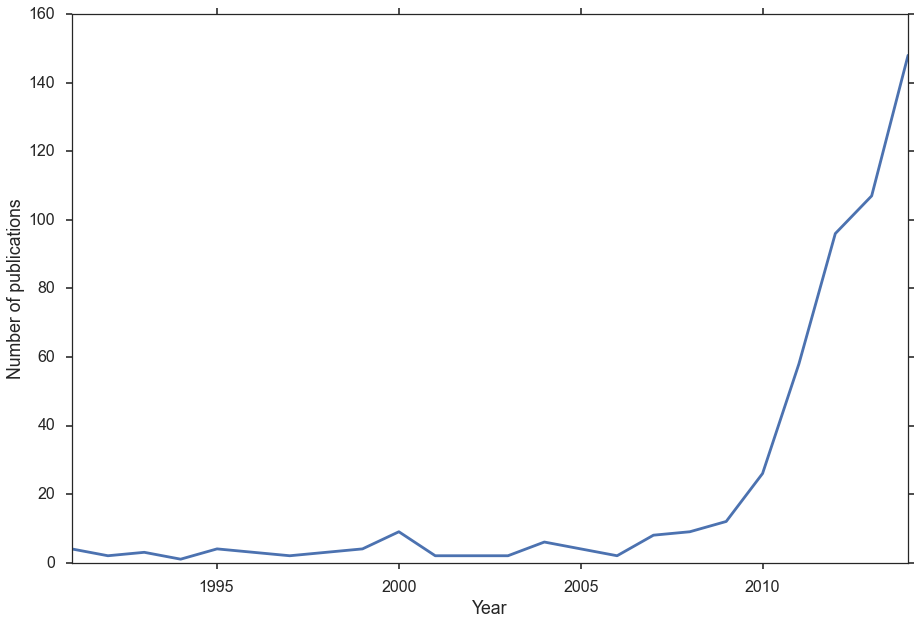

In [3]:
nonzero_years = df[(df.Year>1990) & (df.Year<2015)]
pd.DataFrame(nonzero_years.Year.value_counts()).sort().plot()
plt.xlabel('Year')
plt.ylabel('Number of publications')
plt.legend([])
plt.tight_layout()
plt.savefig('growth clean.png')

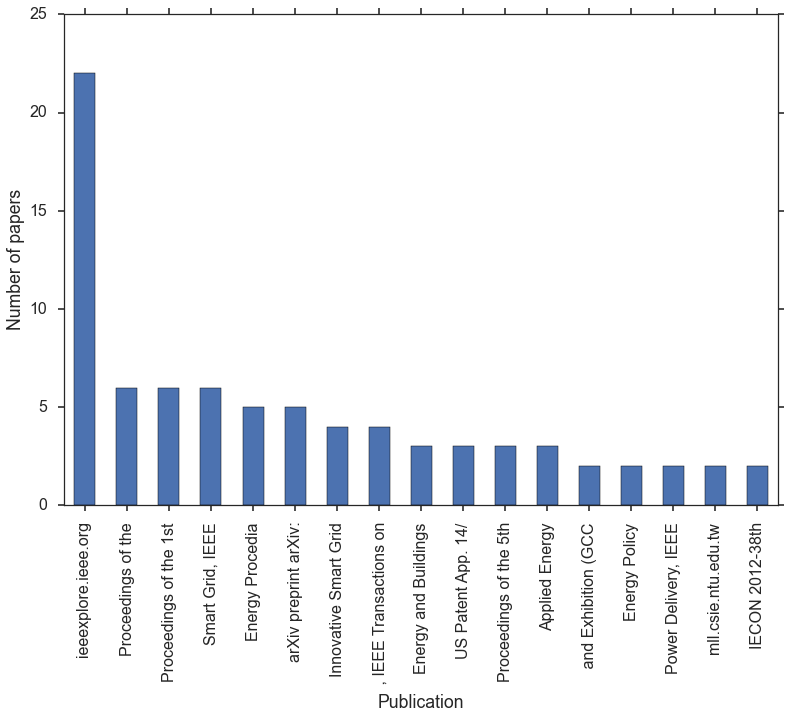

In [4]:
counts = df.Source.value_counts().head(20)
counts = counts[counts.index.to_series().apply(lambda x: '?' not in x)]
counts.plot(kind='bar')
plt.xlabel('Publication')
plt.ylabel('Number of papers')

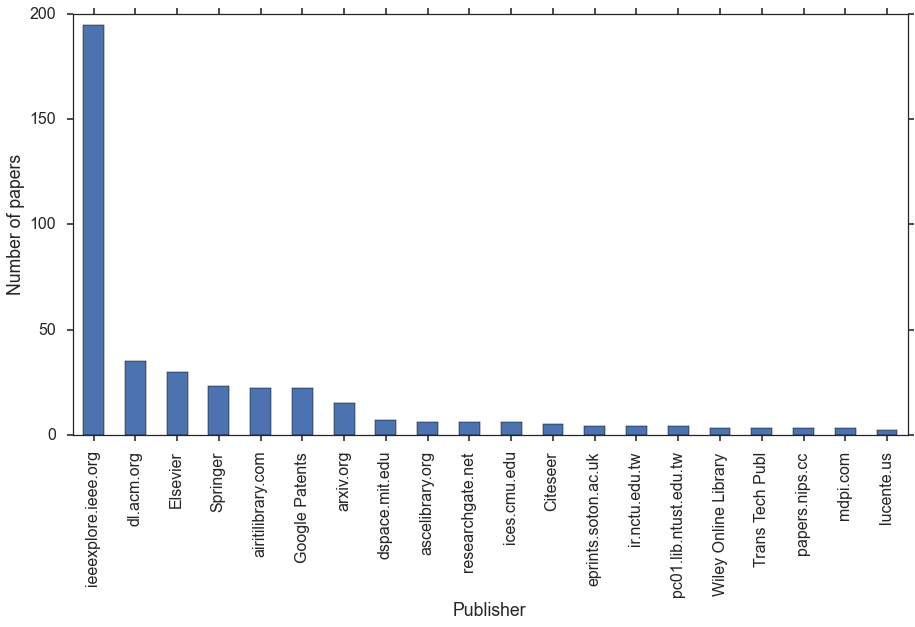

In [5]:
df.Publisher.value_counts().head(20).plot(kind='bar')
plt.xlabel('Publisher')
plt.ylabel('Number of papers')
plt.tight_layout()
plt.savefig('publisher clean.png')

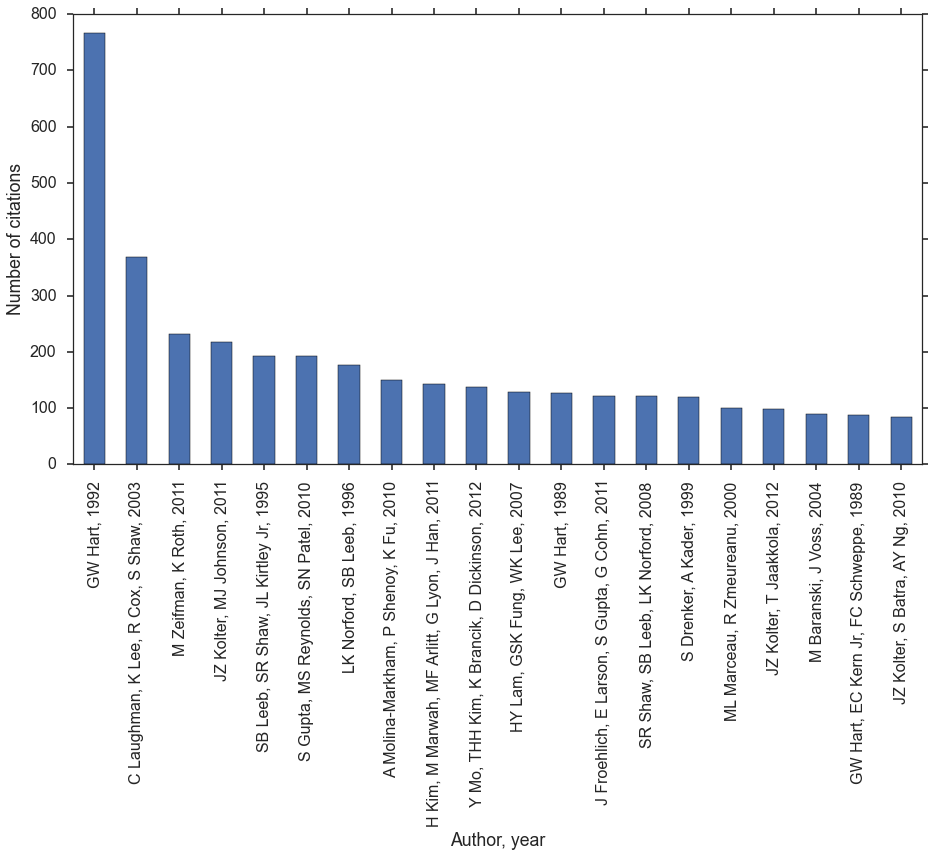

In [16]:
plt.figure(figsize=(13,12))
df['Author, year'] = df['Authors'] + ', ' + [str(x) for x in df['Year']]
df.set_index('Author, year').Cites.head(20).plot(kind='bar')
plt.ylabel('Number of citations')
plt.tight_layout()
plt.savefig('citations clean.png')

/Users/oliver.parson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


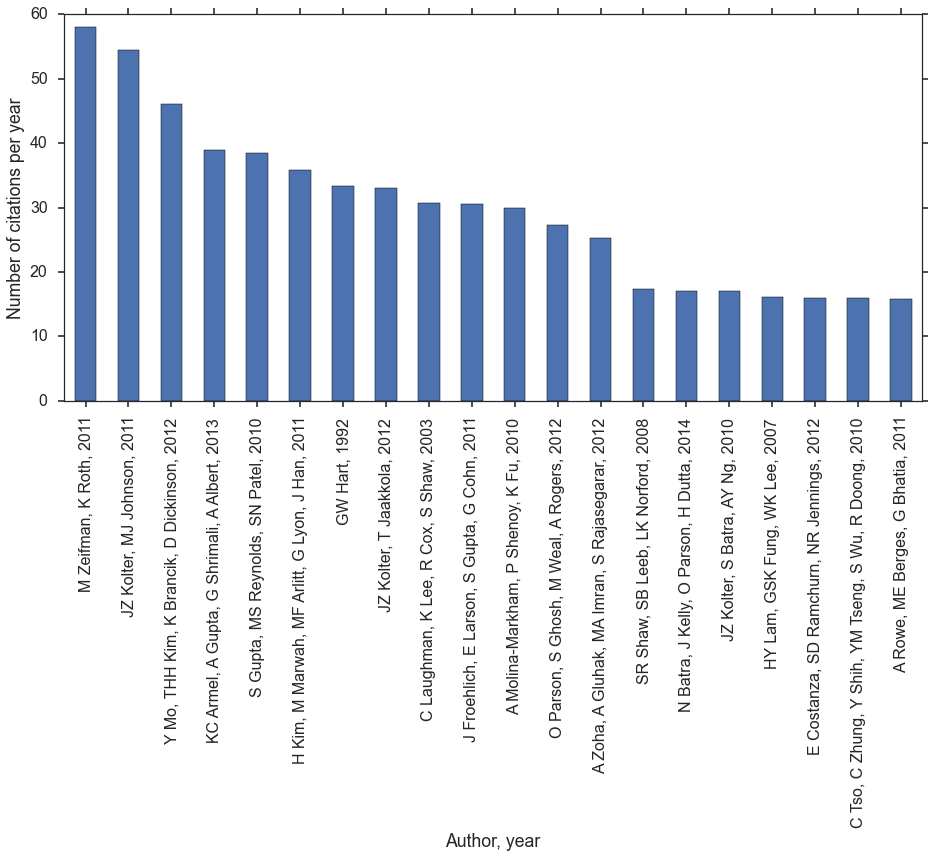

In [17]:
plt.figure(figsize=(13,12))
df['Citations per year'] = df['Cites'] / (2015.0-df['Year'])
df.set_index('Author, year').sort('Citations per year',ascending=False)['Citations per year'].head(20).plot(kind='bar')
plt.ylabel('Number of citations per year')
plt.tight_layout()
plt.savefig('citations per year clean.png')

/Users/oliver.parson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


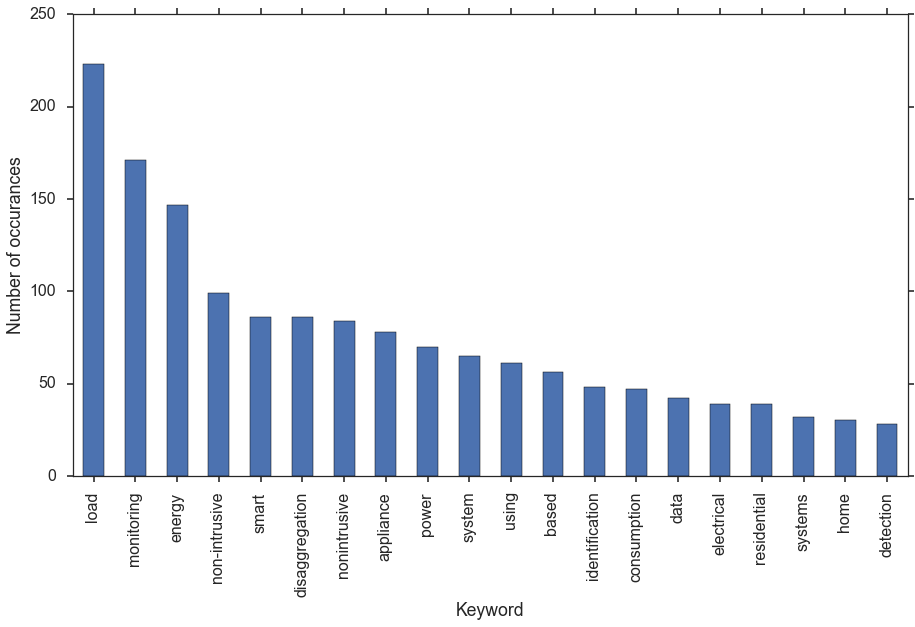

In [8]:
asdf=[x.split(' ') for x in df.Title.values]
new=[]
for x in asdf:
    for y in x:
        new.append(y)
new = [s.lower() for s in new]
skip = ['for','of','and','in','a','on','the','to','A','an','with']
plot_df = pd.DataFrame(new)
plot_df.columns = ['words']
plot_df['count'] = 1
plot_df = plot_df.groupby('words').count().sort('count', ascending=False).reset_index()
idx = [x in skip for x in plot_df.words]
idx = [x==False for x in idx]
plot_df[idx].set_index('words').head(20).plot(kind='bar')
plt.xlabel('Keyword')
plt.ylabel('Number of occurances')
plt.legend([])
plt.tight_layout()
plt.savefig('keywords clean.png')